## Setting Up Your Environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the Data

In [4]:
# Load application data
app_data = pd.read_csv('application-data.csv')

# Load previous application data
prev_app_data = pd.read_csv('previous-application.csv')

In [5]:
# View first few rows of application data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# View first few rows of previous application data
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding the Data Structure

In [9]:
# Shape of the data
print("Application data shape:", app_data.shape)
print("Previous application data shape:", prev_app_data.shape)

# Summary of application data
app_data.info()

# Summary of previous application data
prev_app_data.info()

Application data shape: (307511, 122)
Previous application data shape: (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  fl

## Handling Missing Values

In [11]:
# Calculate percentage of missing values per column
missing_values_app = app_data.isnull().mean().sort_values(ascending=False) * 100

# Filter columns with missing values greater than a threshold (e.g., 40%)
missing_columns_app = missing_values_app[missing_values_app > 40].index

# Display columns with high missing values
print("Columns in application data with more than 40% missing values:")
print(missing_columns_app)

Columns in application data with more than 40% missing values:
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', '

In [12]:
# Drop columns with more than 40% missing values
app_data_cleaned = app_data.drop(columns=missing_columns_app)

In [13]:
missing_values_prev = prev_app_data.isnull().mean().sort_values(ascending=False) * 100
missing_columns_prev = missing_values_prev[missing_values_prev > 40].index

print("Columns in previous application data with more than 40% missing values:")
print(missing_columns_prev)

# Drop columns with high missing values
prev_app_data_cleaned = prev_app_data.drop(columns=missing_columns_prev)

Columns in previous application data with more than 40% missing values:
Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')


In [14]:
# Impute missing numerical values
num_cols_app = app_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
app_data_cleaned[num_cols_app] = app_data_cleaned[num_cols_app].fillna(app_data_cleaned[num_cols_app].median())

# Impute missing categorical values
cat_cols_app = app_data_cleaned.select_dtypes(include=['object']).columns
app_data_cleaned[cat_cols_app] = app_data_cleaned[cat_cols_app].fillna(app_data_cleaned[cat_cols_app].mode().iloc[0])

## Dealing with Anomalies and Outliers

In [16]:
# Convert age to years
app_data_cleaned['AGE_YEARS'] = (-app_data_cleaned['DAYS_BIRTH']) / 365

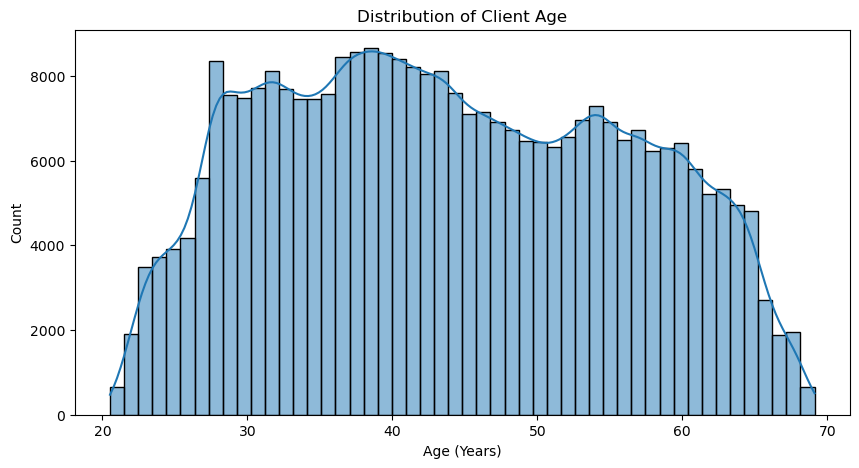

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(app_data_cleaned['AGE_YEARS'], bins=50, kde=True)
plt.title('Distribution of Client Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

##### Conclusions from the graph:

> Most clients fall within the age range of 30 to 40 years old.

> Risk Assessment:
> + Younger Clients: Often associated with higher risk due to less stable income and shorter credit history.
> + Older Clients: Tend to be more financially stable with established credit histories.

In [19]:
# Identify anomalies in 'DAYS_EMPLOYED'
anomalies = app_data_cleaned[app_data_cleaned['DAYS_EMPLOYED'] == 365243]
print("Number of anomalies in 'DAYS_EMPLOYED':", anomalies.shape[0])

# Replace the anomalous values with NaN and assign back to the column
app_data_cleaned['DAYS_EMPLOYED'] = app_data_cleaned['DAYS_EMPLOYED'].replace(365243, np.nan)

# Impute missing values with the median
app_data_cleaned['DAYS_EMPLOYED'] = app_data_cleaned['DAYS_EMPLOYED'].fillna(app_data_cleaned['DAYS_EMPLOYED'].median())

Number of anomalies in 'DAYS_EMPLOYED': 55374


## Encoding Categorical Variables

In [21]:
# Use one-hot encoding on categorical columns
app_data_encoded = pd.get_dummies(app_data_cleaned, drop_first=True)

## Income-to-Credit Ratio

In [23]:
app_data_encoded['INCOME_CREDIT_RATIO'] = app_data_encoded['AMT_INCOME_TOTAL'] / app_data_encoded['AMT_CREDIT']

## Merging Datasets

In [25]:
# Merging datasets
data_merged = app_data_encoded.merge(prev_app_data_cleaned, on='SK_ID_CURR', how='left')

## Exploratory Data Analysis (EDA)

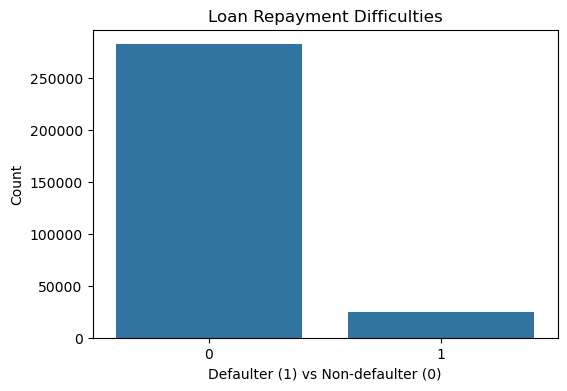

In [27]:
# Plotting the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=app_data_encoded)
plt.title('Loan Repayment Difficulties')
plt.xlabel('Defaulter (1) vs Non-defaulter (0)')
plt.ylabel('Count')
plt.show()

##### Conclusions from the graph:

> The majority of loan applicants are successfully repaying their loans, with fewer experiencing repayment difficulties.

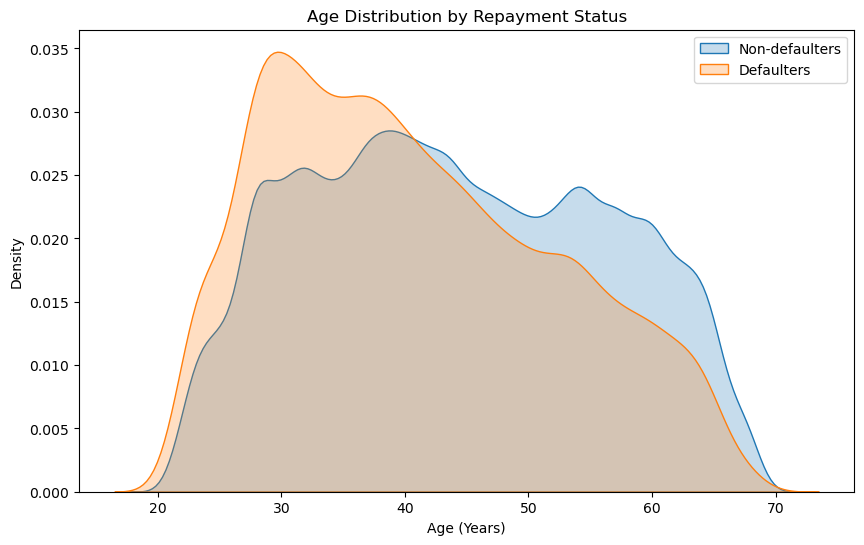

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(app_data_encoded.loc[app_data_encoded['TARGET'] == 0, 'AGE_YEARS'], label='Non-defaulters', fill=True)
sns.kdeplot(app_data_encoded.loc[app_data_encoded['TARGET'] == 1, 'AGE_YEARS'], label='Defaulters', fill=True)
plt.title('Age Distribution by Repayment Status')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend()
plt.show()

##### Conclusions from the graph:

> Young customers (under 30 years old) face more challenges in loan repayment, possibly due to less stable income or lack of experience in financial management.

> The majority of our customers fall within the 30 to 40-year-old age range, a group with a better repayment rate.

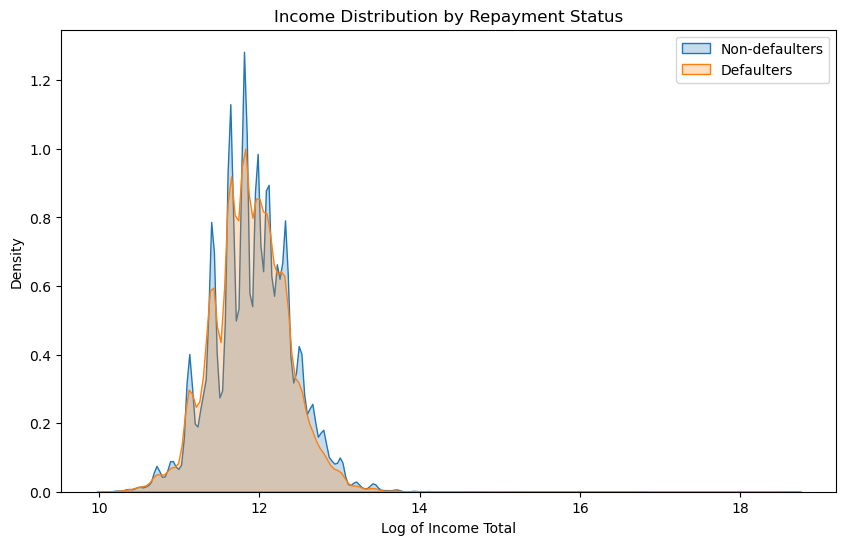

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log(app_data_encoded.loc[app_data_encoded['TARGET'] == 0, 'AMT_INCOME_TOTAL']), label='Non-defaulters', fill=True)
sns.kdeplot(np.log(app_data_encoded.loc[app_data_encoded['TARGET'] == 1, 'AMT_INCOME_TOTAL']), label='Defaulters', fill=True)
plt.title('Income Distribution by Repayment Status')
plt.xlabel('Log of Income Total')
plt.ylabel('Density')
plt.legend()
plt.show()

##### Conclusions from the graph:

> In the graph, you likely observed a strong negative correlation between income and default status.

> Essentially, as individuals' incomes increase, their probability of defaulting decreases.

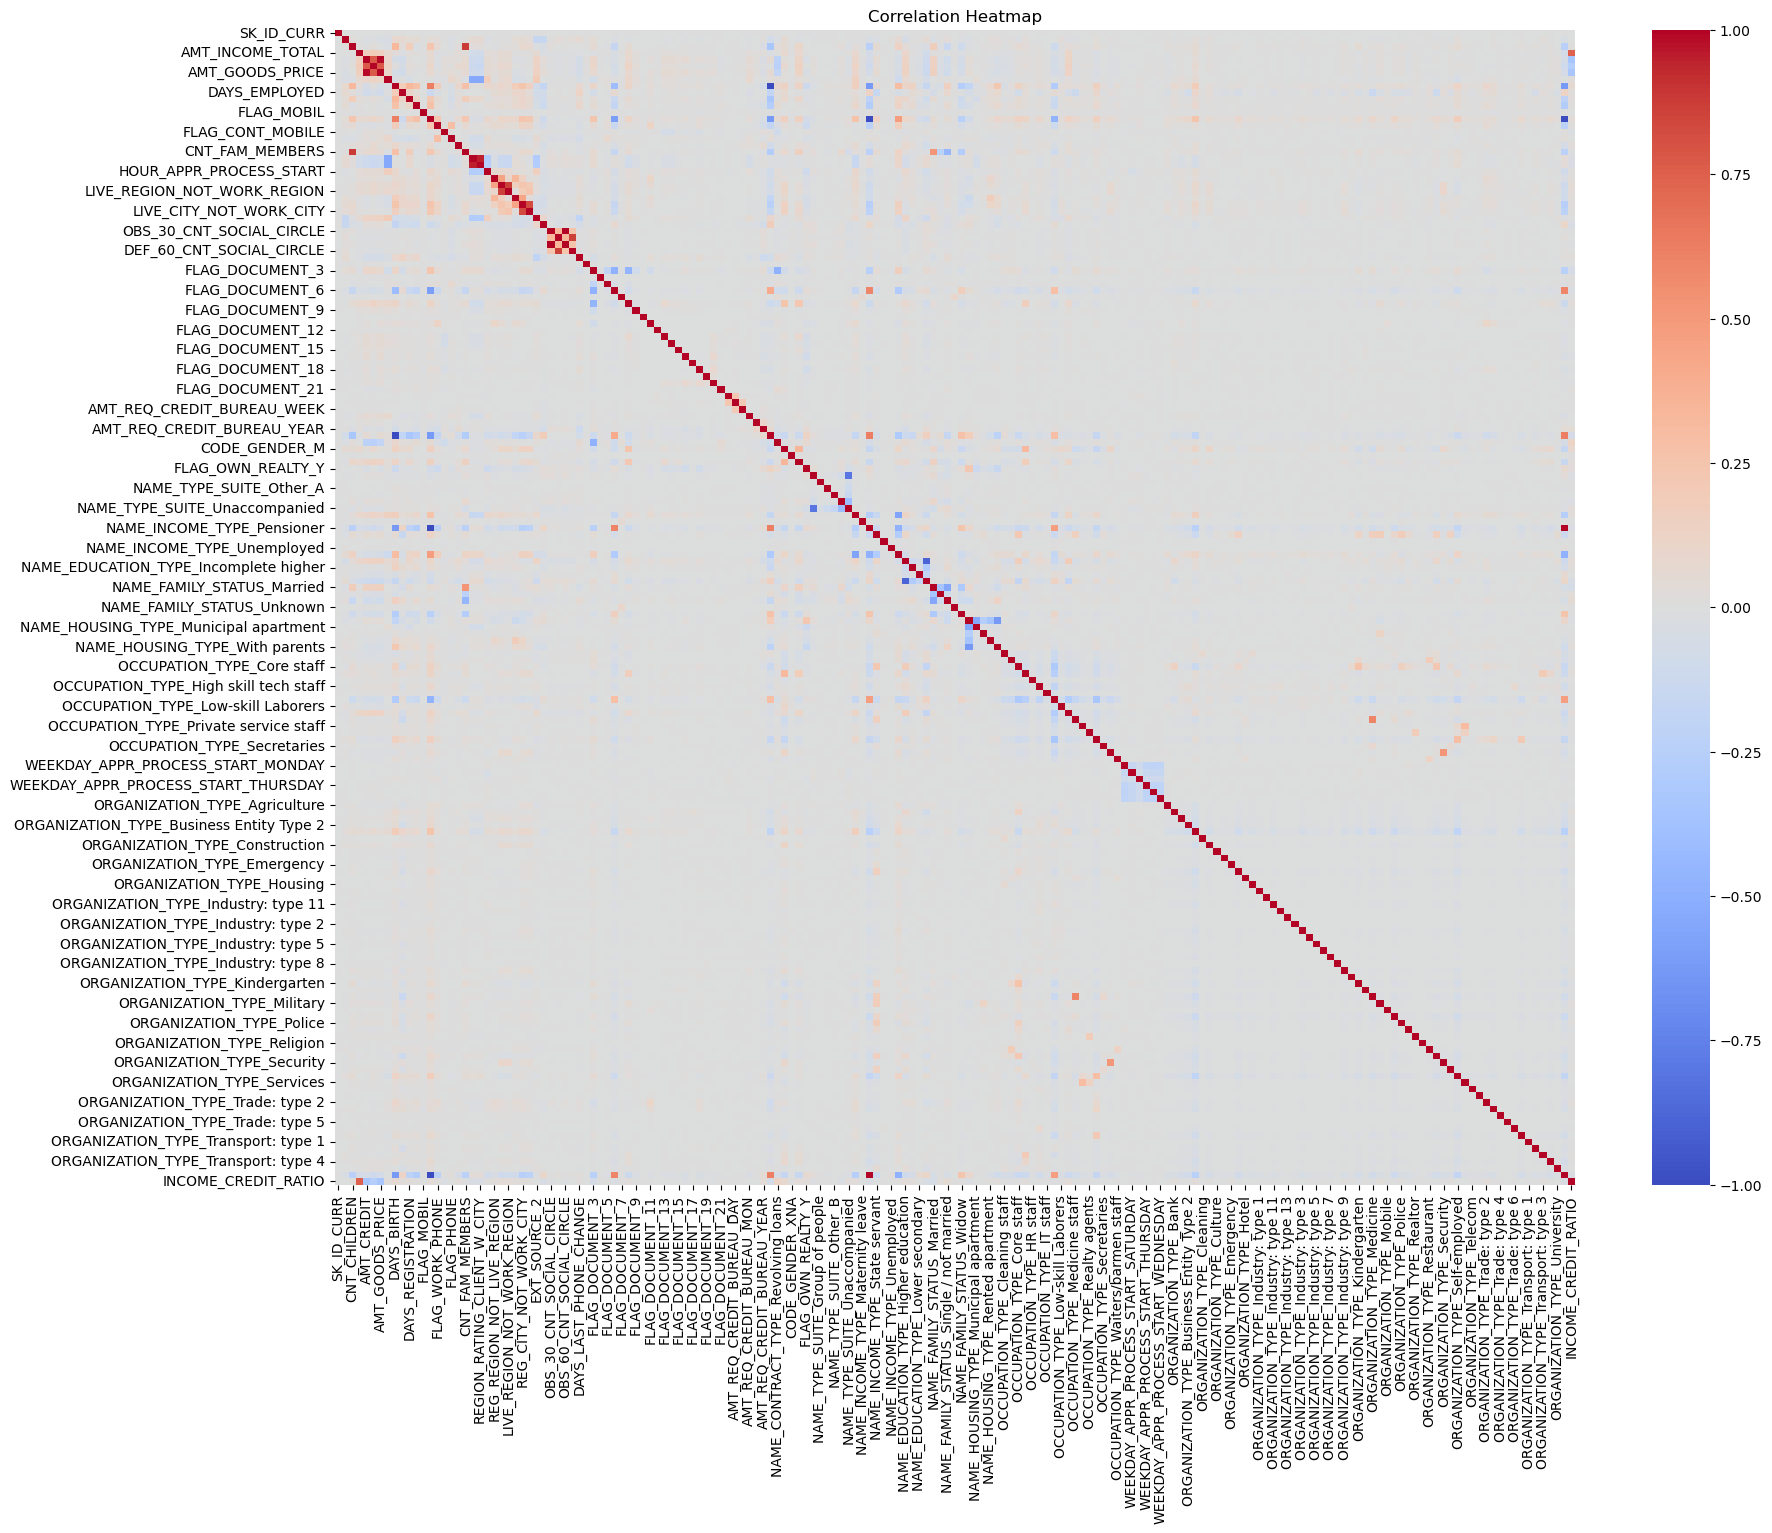

In [36]:
# Compute the correlation matrix
corr_matrix = app_data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### Conclusions from the graph:

> Income Level: If AMT_INCOME_TOTAL has a strong negative correlation with TARGET, it confirms that higher-income individuals are less likely to default—a critical insight for risk assessment.

> Age and Years Employed: Variables like DAYS_BIRTH and DAYS_EMPLOYED might be highly correlated, as older applicants typically have longer employment histories.

> Education Level: If NAME_EDUCATION_TYPE shows a strong correlation, it suggests education significantly impacts default risk, perhaps more than anticipated.

> Credit Bureau Scores: Variables related to credit history might cluster together, emphasizing the importance of past credit behavior.

> Employment Type: If NAME_INCOME_TYPE correlates with default, certain employment categories may require closer scrutiny.

## Identifying Significant Factors

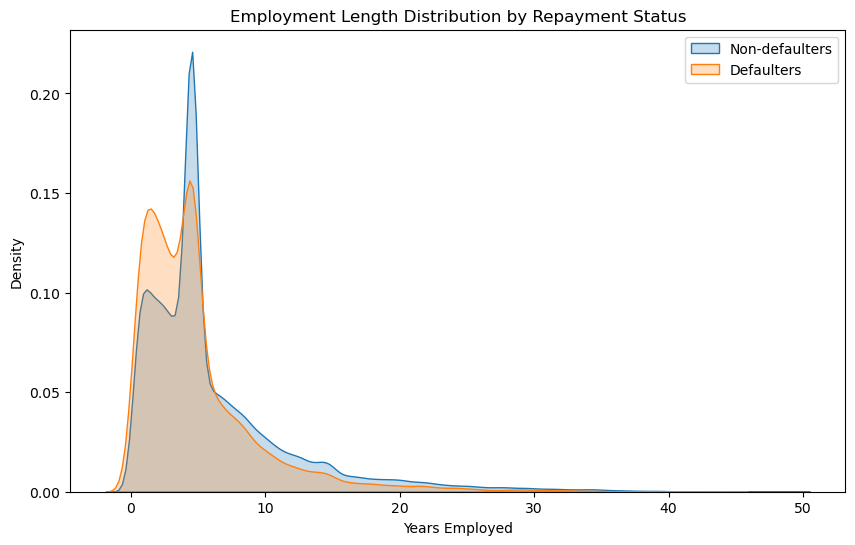

In [42]:
# Convert days employed to years
app_data_encoded['YEARS_EMPLOYED'] = (-app_data_encoded['DAYS_EMPLOYED']) / 365

# Visualize
plt.figure(figsize=(10, 6))
sns.kdeplot(app_data_encoded.loc[app_data_encoded['TARGET'] == 0, 'YEARS_EMPLOYED'], label='Non-defaulters', fill=True)
sns.kdeplot(app_data_encoded.loc[app_data_encoded['TARGET'] == 1, 'YEARS_EMPLOYED'], label='Defaulters', fill=True)
plt.title('Employment Length Distribution by Repayment Status')
plt.xlabel('Years Employed')
plt.ylabel('Density')
plt.legend()
plt.show()

##### Conclusions from the graph:

> The clients with longer employment histories are more likely to repay loans successfully.
    
> The clients with shorter employment durations are more prone to default.

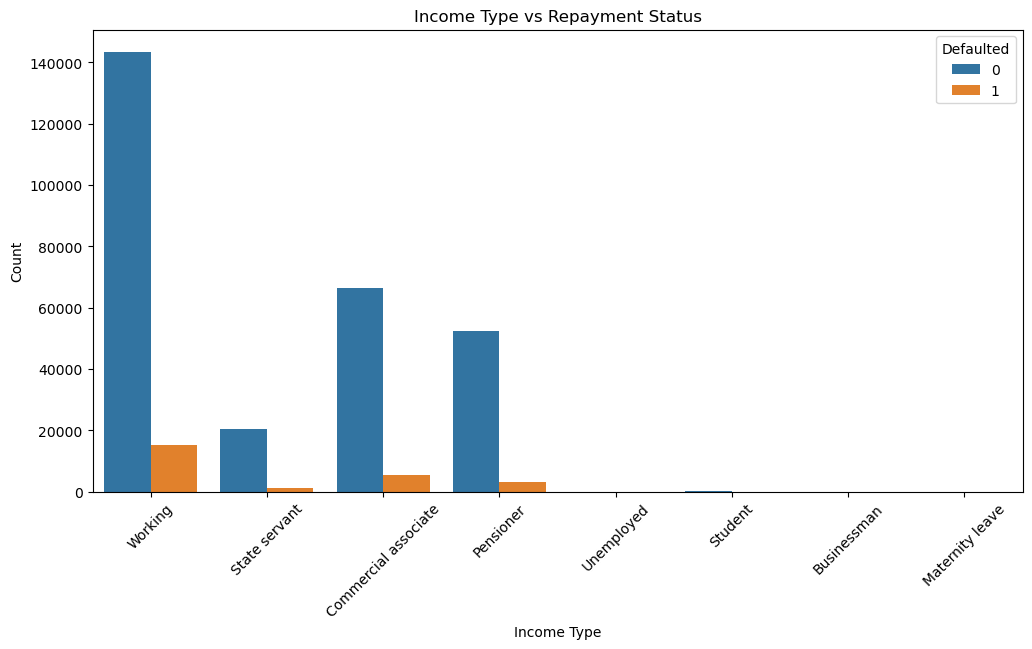

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=app_data_cleaned)
plt.title('Income Type vs Repayment Status')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Defaulted')
plt.show()

##### Conclusions from the graph:

> The categories Unemployed, Businessman, and Maternity leave either do not need to borrow money or are unable to borrow money.

> Students have a low borrowing capacity but are all capable of repaying their loans.

> Among the remaining four categories, State servants have the lowest borrowing amounts, and their default rate is very low (nearly 0%).

> For the other three categories (Working, Commercial associate, and Pensioner), those in the Working category borrow the most, but the default rate for all three categories is around 5%.

## Multivariate Analysis

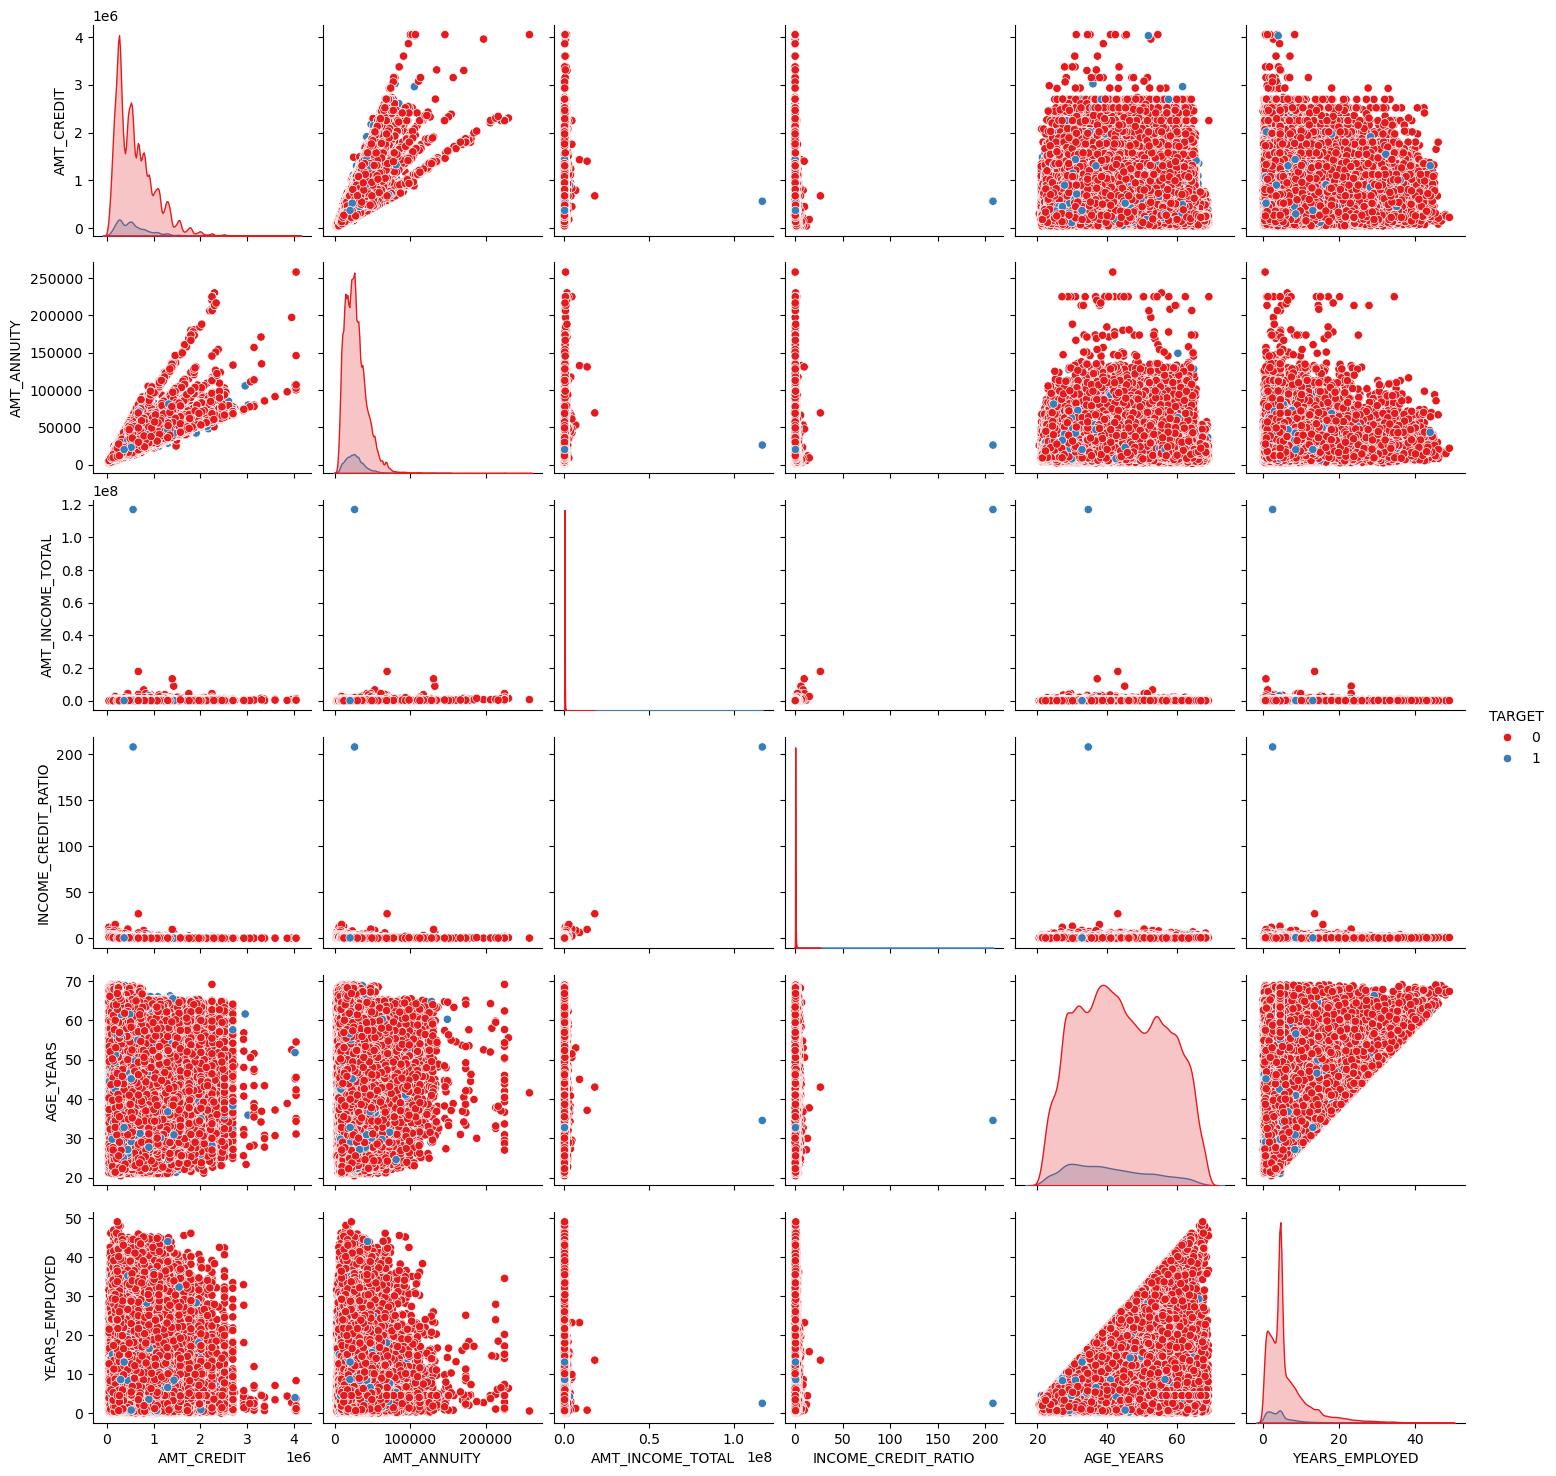

In [48]:
# Select relevant features
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'INCOME_CREDIT_RATIO', 'AGE_YEARS', 'YEARS_EMPLOYED', 'TARGET']

# Pair plot
sns.pairplot(app_data_encoded[features], hue='TARGET', palette="Set1")
plt.show()

##### Conclusions from the graph:
> Income and Credit Amount (AMT_INCOME_TOTAL vs. AMT_CREDIT)
> + Non-defaulted applicants (TARGET = 0) tend to have higher incomes and higher credit amounts, whereas defaulted applicants (TARGET = 1) cluster around lower income levels.
> + Higher income levels are associated with larger loan amounts and a lower risk of default. This supports the idea that income is a strong predictor of loan repayment capability.

> Income and Annuity Amount (AMT_INCOME_TOTAL vs. AMT_ANNUITY)
> + There's a positive correlation between income and annuity amounts for both defaulted and non-defaulted applicants. However, defaulted applicants often have a higher annuity relative to their income.
> + Applicants who default may be over-leveraged, taking on repayment amounts that are high relative to their income. This indicates that the debt burden (as represented by the annuity) is a critical factor in default risk.

> Income Credit Ratio (INCOME_CREDIT_RATIO)
> + Defaulted applicants have a lower INCOME_CREDIT_RATIO, meaning their income is low relative to their credit amount.
> + A lower income-to-credit ratio increases the likelihood of default, emphasizing the importance of ensuring that loan amounts are proportionate to the applicant's income.

> Age vs. Default Status (AGE_YEARS)
> + Younger applicants have a higher concentration in the defaulted group, while older applicants are more represented in the non-defaulted group.
> + Age appears to be inversely related to default risk; with increasing age, the probability of default decreases. This could be due to factors like financial stability improving with age.

> Years Employed (YEARS_EMPLOYED)
> + Applicants with more years of employment tend to default less. Defaulted applicants often have shorter employment histories.
> + Employment stability is a strong indicator of creditworthiness. Longer employment tenure may reflect steady income and job security, reducing default risk.

> Credit Amount and Annuity (AMT_CREDIT vs. AMT_ANNUITY)
> + There's a strong positive correlation between the credit amount and the annuity for both groups, which is expected since larger loans require higher annual repayments.
> + While this relationship is logical, it's important to ensure that the annuity is set appropriately relative to the applicant's income to minimize default risk.

> Interactions Between Features
> + Combination of Low Income and High Credit Amount: Applicants who have lower incomes but are granted high credit amounts are predominantly in the defaulted group.
> + Income and Years Employed: Those with both higher income and longer employment are less likely to default, suggesting a compounded effect of these two factors on default risk.

## Insights and Recommendations

> Age Factor: Younger clients might have higher default rates.

> Income Level: Lower income levels could be associated with higher defaults.

> Employment Length: Clients with shorter employment history may be riskier.

> Income Type: Certain income types might be more prone to defaults.